# Correlation Analysis

In [2]:
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix
from scipy.sparse import issparse
import scanpy as sc
import scipy.stats
print(ad.__version__)

0.11.4


In [10]:
# Load young and old data
# cell_type = "CD8-positive, alpha-beta cytotoxic T cell"
cell_type = "CD14-positive monocyte"
young_path = "{}_young_donors.h5ad".format(cell_type)
old_path = "{}_old_donors.h5ad".format(cell_type)
adata_young = ad.read_h5ad(young_path)
adata_old = ad.read_h5ad(old_path)
print(adata_young)
print(adata_old)

AnnData object with n_obs × n_vars = 2 × 48
    obs: 'cell_type', 'development_stage', 'n_cells'
AnnData object with n_obs × n_vars = 2 × 48
    obs: 'cell_type', 'development_stage', 'n_cells'


In [11]:
# Check that every gene is expressed at least once in each dataset in .X
young_check = np.sum(adata_young.X != 0, axis=0)
old_check = np.sum(adata_old.X != 0, axis=0)

# Check that every number in young_check is greater than 0
if np.all(young_check > 0):
    print("All genes expressed at least once in young dataset")

# Check that every number in old_check is greater than 0
if np.all(old_check > 0):
    print("All genes expressed at least once in old dataset")

All genes expressed at least once in young dataset
All genes expressed at least once in old dataset


In [12]:
# Get the expression matrix (cells x genes)
if issparse(adata_young.X):
    expr_matrix = adata_young.X.toarray()  # Convert sparse to dense if needed
else:
    expr_matrix = adata_young.X

# Transpose to genes x cells for correlation calculation
expr_matrix = expr_matrix.T

# Calculate correlation matrix (Pearson)
corr_matrix = np.corrcoef(expr_matrix)

# Convert to DataFrame for easier handling
gene_names = adata_young.var_names
corr_df = pd.DataFrame(corr_matrix, index=gene_names, columns=gene_names)

In [13]:
# Print the diagonal of the correlation matrix and check for NaN values
print("Diagonal of the correlation matrix (should be 1):")
print(corr_df.values.diagonal())
print("Number of NaN values in the correlation matrix:")
print(np.isnan(corr_df.values).sum())

Diagonal of the correlation matrix (should be 1):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Number of NaN values in the correlation matrix:
0


First few rows of the correlation matrix:
        gene_0  gene_1  gene_2  gene_3  gene_4  gene_5  gene_6  gene_7  \
gene_0     1.0     1.0     1.0    -1.0    -1.0     1.0    -1.0     1.0   
gene_1     1.0     1.0     1.0    -1.0    -1.0     1.0    -1.0     1.0   
gene_2     1.0     1.0     1.0    -1.0    -1.0     1.0    -1.0     1.0   
gene_3    -1.0    -1.0    -1.0     1.0     1.0    -1.0     1.0    -1.0   
gene_4    -1.0    -1.0    -1.0     1.0     1.0    -1.0     1.0    -1.0   

        gene_8  gene_9  ...  gene_38  gene_39  gene_40  gene_41  gene_42  \
gene_0     1.0    -1.0  ...      1.0     -1.0     -1.0     -1.0      1.0   
gene_1     1.0    -1.0  ...      1.0     -1.0     -1.0     -1.0      1.0   
gene_2     1.0    -1.0  ...      1.0     -1.0     -1.0     -1.0      1.0   
gene_3    -1.0     1.0  ...     -1.0      1.0      1.0      1.0     -1.0   
gene_4    -1.0     1.0  ...     -1.0      1.0      1.0      1.0     -1.0   

        gene_43  gene_44  gene_45  gene_46  gene_47  
ge

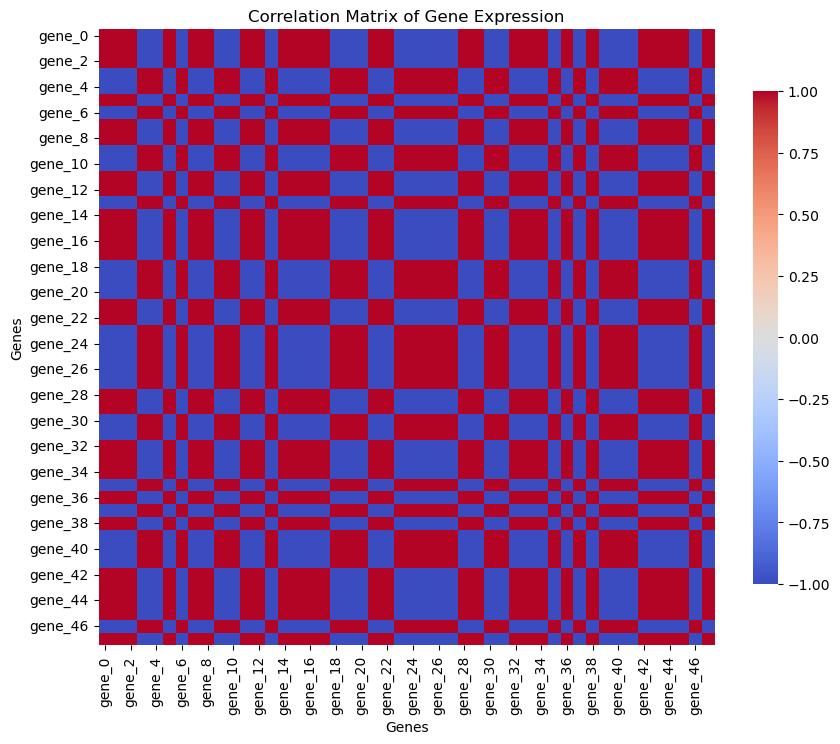

In [17]:
# Print the first few rows of the correlation matrix
print("First few rows of the correlation matrix:")
print(corr_df.head())

# Plot the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, cmap='coolwarm', center=0, square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Gene Expression")
plt.xlabel("Genes")
plt.ylabel("Genes")
plt.show()

In [25]:
# Find top correlated genes for a specific gene of interest
target_gene = "ENSG00000166710"
if target_gene in corr_df.columns:
    target_correlations = corr_df[target_gene].sort_values(ascending=False)
    print(f"Top genes correlated with {target_gene}:")
    print(target_correlations.head(10))
else:
    print(f"{target_gene} not found in the dataset")

Top genes correlated with ENSG00000166710:
ENSG00000166710    1.000000
ENSG00000204525    0.879935
ENSG00000147168    0.865610
ENSG00000234745    0.860340
ENSG00000206503    0.831529
ENSG00000185885    0.813374
ENSG00000196262    0.769701
ENSG00000108518    0.758690
ENSG00000145649    0.753284
ENSG00000198668    0.735146
Name: ENSG00000166710, dtype: float64


In [14]:
# Get the expression matrix for old donors
if issparse(adata_old.X):
    expr_matrix_old = adata_old.X.toarray()  # Convert sparse to dense if needed
else:
    expr_matrix_old = adata_old.X

# Transpose to genes x cells for correlation calculation
expr_matrix_old = expr_matrix_old.T

# Calculate correlation matrix (Pearson) for old donors
corr_matrix_old = np.corrcoef(expr_matrix_old)

# Convert to DataFrame for easier handling
corr_df_old = pd.DataFrame(corr_matrix_old, index=gene_names, columns=gene_names)

In [15]:
# Print the diagonal of the correlation matrix and check for NaN values
print("Diagonal of the correlation matrix (should be 1):")
print(corr_df_old.values.diagonal())
print("Number of NaN values in the correlation matrix:")
print(np.isnan(corr_df_old.values).sum())

Diagonal of the correlation matrix (should be 1):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Number of NaN values in the correlation matrix:
0


In [28]:
# Find top correlated genes for a specific gene of interest in old donors
if target_gene in corr_df_old.columns:
    target_correlations_old = corr_df_old[target_gene].sort_values(ascending=False)
    print(f"Top genes correlated with {target_gene} in old donors:")
    print(target_correlations_old.head(10))
else:
    print(f"{target_gene} not found in the old donor dataset")

Top genes correlated with ENSG00000166710 in old donors:
ENSG00000166710    1.000000
ENSG00000147168    0.818642
ENSG00000198821    0.797913
ENSG00000204525    0.794538
ENSG00000101608    0.791532
ENSG00000172543    0.769439
ENSG00000100242    0.756032
ENSG00000077984    0.750802
ENSG00000111348    0.741904
ENSG00000105374    0.734490
Name: ENSG00000166710, dtype: float64
